<a href="https://colab.research.google.com/github/abhranil-datascience/ClusteringPOC/blob/master/KMeansClusteringPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/Clustering/KMeans')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########### Import Dataset #############
import pandas as pd
dataset=pd.read_csv('Mall_Customers.csv')
CustomerDetails=dataset.iloc[:,1:5].values
########## Categorical Variable ###############
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
CustomerDetails[:,0]=LE.fit_transform(CustomerDetails[:,0])
######### Scaling ###########
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
XScaled=sc_X.fit_transform(CustomerDetails)
######## Check VIF #############
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=[0]*XScaled.shape[1]
for col in range(0,XScaled.shape[1]):
  VIF[col]=VIF[col]+variance_inflation_factor(exog=XScaled,exog_idx=col)#1.714708128168377, 2.290572901849767, 3.1722381380999853, 2.6588692167767225
VIF

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


[1.0087105981036415,
 1.1222952243366244,
 1.0035184342476187,
 1.1218386641105638]

In [0]:
######### Cluster Selection ###############
from sklearn.cluster import KMeans
optimum_clusters=2#19
best_sil_score=-1
from sklearn.metrics import silhouette_score
for clusters in range(2,XScaled.shape[0]-1):
  cluster_KM=KMeans(n_clusters=clusters,init='k-means++',random_state=42)
  label=cluster_KM.fit_predict(XScaled)
  curr_sil_score=silhouette_score(X=XScaled,labels=label,random_state=42)
  if curr_sil_score>best_sil_score:
    print("New Optimum Number of Clusters: "+str(clusters)+" || Silhouette Score: "+str(curr_sil_score))
    best_sil_score=curr_sil_score
    optimum_clusters=clusters

New Optimum Number of Clusters: 2 || Silhouette Score: 0.2518152915788437
New Optimum Number of Clusters: 3 || Silhouette Score: 0.25951265087431563
New Optimum Number of Clusters: 4 || Silhouette Score: 0.3016237438985174
New Optimum Number of Clusters: 5 || Silhouette Score: 0.31709067955763137
New Optimum Number of Clusters: 6 || Silhouette Score: 0.3336281031933481
New Optimum Number of Clusters: 7 || Silhouette Score: 0.3573771582429211
New Optimum Number of Clusters: 8 || Silhouette Score: 0.3873969164416463
New Optimum Number of Clusters: 9 || Silhouette Score: 0.40225202468243715
New Optimum Number of Clusters: 10 || Silhouette Score: 0.420342376994601
New Optimum Number of Clusters: 11 || Silhouette Score: 0.4273168801169479
New Optimum Number of Clusters: 13 || Silhouette Score: 0.42761474896919277
New Optimum Number of Clusters: 14 || Silhouette Score: 0.4295952830224114
New Optimum Number of Clusters: 17 || Silhouette Score: 0.43397100575299247
New Optimum Number of Cluster

Text(0, 0.5, 'WCSS')

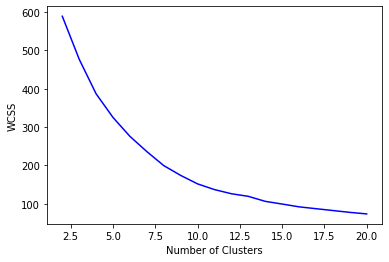

In [0]:
########## Plot WCSS #################
wcss=[]
for clstr_wcss in range(2,21):
  kmeans=KMeans(n_clusters=clstr_wcss,init='k-means++',random_state=42)
  kmeans.fit(XScaled)
  wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2,21),wcss,c='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')